# Part 1: Filtering and processing data
The first step of the analysis is to filter the dataframe 'movie.metadata', and to reshape it so that it the relevant features are easily accessible.
#### **1) Importing the data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import ast
from datetime import datetime


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%reload_ext autoreload

In [5]:
dataframe = pd.read_csv('Data/movie.metadata.tsv', sep='\t', names = ['Wikipedia movieID', 'Freebase movieID', 'Movie name', 'Movie release date', 'Movie box office revenue','Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres' ])

display(dataframe)

,Wikipedia movieID,Freebase movieID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


#### **2) Processing the release date column**

In order to perform a study on month of release, we need to check what is the proportion of movies which don't have the month of release. If this proportion is not too high, we can continue our analysis. We then need to process the release date column so that the month and year of release are easily accessible.


Note: At each transformation of the original dataframe, deep copies are performed in order to keep track of its evolution.

**2.1) Create the "Movie release year" column:**

In [6]:
# Deep copy
# df_with_year := add a release year column
df_with_years = dataframe.copy(deep = True)

# Drop nan values
df_with_years = df_with_years.dropna(subset=['Movie release date'])

# Add release year column
df_with_years['Movie release year'] = df_with_years['Movie release date'].str[0:4]

# Convert to numeric values
df_with_years['Movie release year'] = pd.to_numeric(df_with_years['Movie release year'], errors='raise') 

# Sort the movies by ascending order of release year
df_with_years = df_with_years.sort_values('Movie release year', ascending=True) 

# Drop the first row which has an error in the release year (1010)
df_with_years = df_with_years.drop(df_with_years[df_with_years['Movie release year'] == 1010].index)

# Reset the indexation 
df_with_years = df_with_years.reset_index(drop = True)

df_with_years

,Wikipedia movieID,Freebase movieID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1888
1,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1889
2,6431996,/m/0g53t3,"Monkeyshines, No. 1",1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1890
3,22770416,/m/0gj9h_4,London's Trafalgar Square,1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1890
4,27773121,/m/0cc8h1v,Newark Athlete,1891,NaN,0.20,{},{},"{""/m/02hmvc"": ""Short Film""}",1891
...,...,...,...,...,...,...,...,...,...,...
74833,25813358,/m/0gmbk1g,Avatar 2,2015,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",2015
74834,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},"{""/m/06n90"": ""Science Fiction""}",2015
74835,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2016
74836,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{},2016


**2.2) Percentage missing month per year:** 

Now that the year of release is accessible, the percentage of missing month per year can be computed, so that we can understand better its evolution.

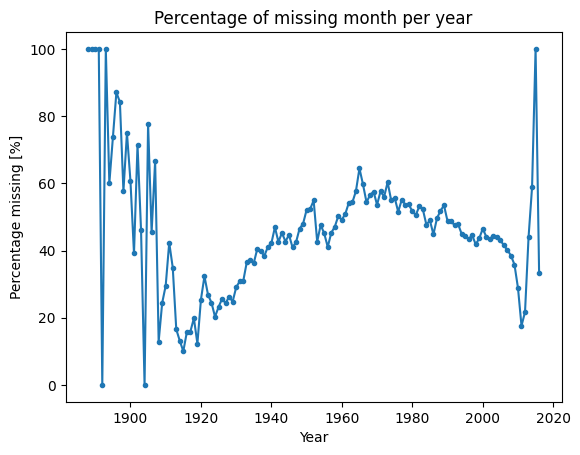

In [7]:
percentage = lambda x: (x.astype(str).apply(len) < 5).mean() * 100

missing_data_percentage = df_with_years.groupby('Movie release year')['Movie release date'].apply(percentage)

plt.plot(missing_data_percentage.index, missing_data_percentage.values, marker='.')
plt.title('Percentage of missing month per year')
plt.xlabel('Year')
plt.ylabel('Percentage missing [%]')
plt.show()

A COMMENTER

**2.3) Proportion of data with a release month:**

In [8]:
# Deep copy
# df_with_months := rows which all have release month 
df_with_months = df_with_years.copy(deep=True)

# Remove the row which don't have the month of release
df_with_months = df_with_months[df_with_months['Movie release date'].str.len() > 4]

# Reset the indexation 
df_with_months = df_with_months.reset_index(drop = True)

display(df_with_months)

# Compute the ratio of usable data
ratio = len(df_with_months)*100/len(dataframe)
print(f"The number of movie with the release month is : {len(df_with_months)}\nThe ratio of films with the release month is : {ratio:.2f}%")

,Wikipedia movieID,Freebase movieID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
1,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
2,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
3,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894
4,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894
...,...,...,...,...,...,...,...,...,...,...
42661,35042288,/m/0j630fh,Bulbul,2014-07,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",{},2014
42662,36534974,/m/0kdy118,Noah,2014-03-28,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01hmnh"": ""Fantasy""}",2014
42663,35764246,/m/0jt01_6,Appayya,2014-08-15,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film""}",2014
42664,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{},2016


The number of movie with the release month is : 42666
The ratio of films with the release month is : 52.20%


The data which has a release month represent 52% of the entire dataframe, and 42 667 movies, which is an acceptable number for our study. We can then go further in the analysis.

**2.4) Comparison between the original data and the data with the release month available:** yearly evolution of the number of movies

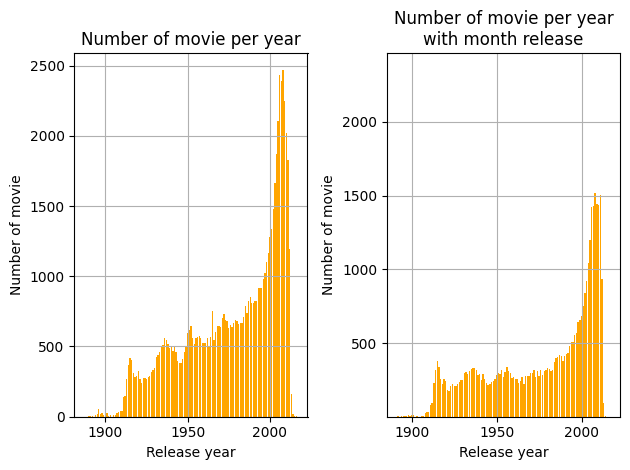

In [9]:
# Counting number of movie per year
film_counts_year = df_with_years['Movie release year'].value_counts().sort_index()

# Counting number of movie with month release per year
film_counts_year_without_missing_months = df_with_months['Movie release year'].value_counts().sort_index()

# Plot the number of movies per year
plt.subplot(1, 2, 1)

plt.bar(film_counts_year.index, film_counts_year.values, color='orange')
plt.title('Number of movie per year')
plt.xlabel('Release year')
plt.ylabel('Number of movie')
plt.grid()

# Plot the number of movies per year
plt.subplot(1, 2, 2)

plt.bar(film_counts_year_without_missing_months.index, film_counts_year_without_missing_months.values, color='orange')
plt.title('Number of movie per year\nwith month release')
plt.xlabel('Release year')
plt.ylabel('Number of movie')
plt.grid()


# Set the same Y-axis limits for both subplots
plt.ylim(min(min(film_counts_year.values), min(film_counts_year_without_missing_months.values)),
        max(max(film_counts_year.values), max(film_counts_year_without_missing_months.values)))

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

A COMMENTER

**2.5) Selecting only the years with enough movies**:

In [10]:
# Takes out all the years where the number of movies is under 200
df_main_years = df_with_months.copy(deep=True)

years_under_200 = film_counts_year_without_missing_months.index[film_counts_year_without_missing_months.values > 200]
df_main_years = df_main_years[df_main_years['Movie release year'].isin(years_under_200)]

print(f"The length of the new dataframe is : {len(df_main_years)}\nOur study will be based on {len(df_main_years)*100/len(dataframe):.2f} % of the complete dataset")

The length of the new dataframe is : 41855
Our study will be based on 51.20 % of the complete dataset


**2.6) Splitting the release date column:** the release month is extracted in the cell 'Movie release month' as well as the season.

**Note:** to denote the season, a number between 1 and 4 is assigned following: 
- 1 : Winter
- 2 : Spring
- 3 : Summer
- 4 : Autumn

In [11]:
# Deep copy
# df_clean_date := the release date column is seperated into 2 columns for the month, and year of release
df_clean_date = df_main_years.copy(deep=True)

# Create a column with only the release month 
df_clean_date['Movie release month'] = df_clean_date['Movie release date'].str[5:7]
#Convert to numeric the release months
df_clean_date['Movie release month'] = pd.to_numeric(df_clean_date['Movie release month'], errors='raise') 

# Sort the movies by ascending order of release year
df_clean_date = df_clean_date.sort_values('Movie release year', ascending=True) 

# Remove the Movie release date column
df_clean_date = df_clean_date.drop(columns=['Movie release date'])

# Reset the indexation 
df_clean_date = df_clean_date.reset_index(drop = True) 

# Add the season column
df_clean_date['Movie release season'] = df_clean_date['Movie release month'].apply(lambda x: 1 if x in [12, 1, 2] else 2 if x in [3, 4, 5] else 3 if x in [6, 7, 8] else 4)


df_clean_date


,Wikipedia movieID,Freebase movieID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Movie release month,Movie release season
0,13388989,/m/03c3qdq,Pirate Gold,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,1,1
1,15839614,/m/03nwzrh,Hinemoa,NaN,24.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,3,2
2,14071789,/m/03cspdc,The Twelfth Juror,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,4,2
3,7709364,/m/0kvflk,In the Mountains of Virginia,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,10,4
4,13389288,/m/03c3qzt,Brothers,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,2,1
...,...,...,...,...,...,...,...,...,...,...,...
41850,36465188,/m/0h2h9tt,El Gringo,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/02kdv5l"": ""Action""}",2012,5,2
41851,35320614,/m/0j7jmy8,Live at the Machine Shop,NaN,67.0,"{""/m/02h40lc"": ""English Language""}",{},"{""/m/0d2rhq"": ""Concert film""}",2012,3,2
41852,34961787,/m/0j438k5,Romeo,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}","{""/m/06cvj"": ""Romantic comedy""}",2012,7,3
41853,34881832,/m/0j45hrp,Putta,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",{},2012,10,4


#### **3) Processing the genre column**

Now that the date column is cleaned, the genre column needs also to be processed. The final goal is to assign to each movie 2 main genres which are relevant for our analysis. 


**Note**: The computational time to perform this filtering is very large because of the iteration over all rows of the dataframe. Indeed, the json format of each cells forces us to iterate over each rows.


**3.1) Gathering all genres and their occurrences:**

In order to assign a main genre to each movie, we first need to find all the genres and their occurrences, to understand better how the genre data is organised. To do so, the frame 'nb_genres' is created using the function 'counting_genres', by iterating over 'df_clean_date', and contains each genre name with their respective occurrence.


In [12]:
from helpers_part1 import counting_genres 

In [13]:
nb_genres = counting_genres(df_clean_date)

In [14]:
nb_genres.head(20)

,genre name,nb of movies
0,Drama,18700
1,Comedy,9893
2,Romance Film,6123
3,Black-and-white,5438
4,Thriller,5272
5,Action,5026
6,Crime Fiction,4212
7,Short Film,4114
8,Indie,4054
9,World cinema,3297


Let's plot the number of movies per genre, for all the different genres we found (the genres are denoted by their index, 0 being the most used genre).

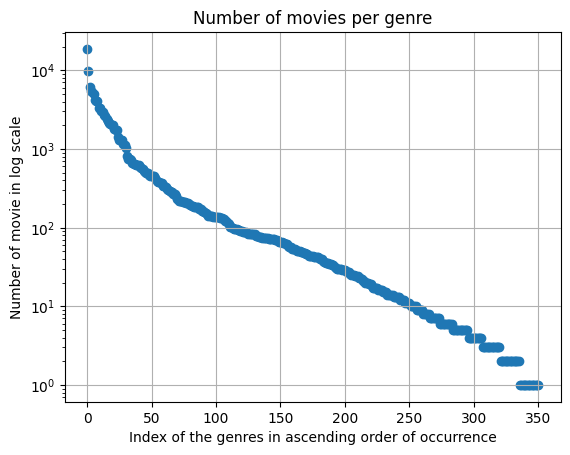

In [15]:
plt.scatter(nb_genres.index,nb_genres['nb of movies'])
plt.yscale("log")
plt.title('Number of movies per genre')
plt.xlabel('Index of the genres in ascending order of occurrence')
plt.ylabel('Number of movie in log scale')
plt.grid()


The 'nb_genres' frame shows that there are 351 different genres, and their occurrence decays as a power low. Indeed, as seen in the above plot, from the 100th genre, there are only 100 or less movies associated to it. This means that taking into account only the first genres will still describe most of the data.

**3.2) Creating main genres clusters**

In the 'nb_genres' frame, one can see that some genres could be grouped together in order to form a bigger group of data. For example, the genre 'Comedy' defines 9893 movies, and the genre 'Comedy film' defines 2423 movies, whereas they could be grouped together. 
Moreover, 8 main genres are chosen to describe the data: 
- Drama
- Comedy
- Romance
- Thriller
- Action
- Family film
- Horror
- Informative

These genres are chosen because they define a high proportion of data, and also because they are the ones which will be relevant further in our study, when the genre of a movie will be presented with respect to the month of release.

The function 'main_genres_cluster' creates the respective genre clusters, and gathers them in a 'main_genres' frame.

In [16]:
from helpers_part1 import main_genres_cluster

The dictionary 'genres_lexical_field' gathers, for each main genre, a lexical field, which allow to find the associated sub-genres. It is then used as input of the function 'main_genres_cluster'.

In [17]:

genres_lexical_field = {'Drama': ['Drama'], 'Comedy': ['Comedy','Slapstick','Parody'],'Romance':['Romance','Romantic'], 
                        'Thriller':['Thriller','Crime'],'Action':['Action','Adventure','War','Western'],'Family film':['Family','Animation'],
                        'Horror':['Horror'],'Informative':['Documentary','Biography','Biopic','History']}

In [18]:
main_genres = main_genres_cluster(genres_lexical_field,nb_genres)

In [19]:
main_genres

,genre name,nb of movies,main name
0,Drama,18700,Drama
1,Family Drama,638,Drama
2,Crime Drama,341,Drama
3,Courtroom Drama,155,Drama
4,Musical Drama,129,Drama
...,...,...,...
80,Biography,749,Informative
81,Biopic [feature],390,Informative
82,History,457,Informative
83,Film & Television History,28,Informative


**3.3) Assigning up to 2 main genres to each movie**

The goal now is to assign main genres to each movies. The function 'reshape_genres_column' uses the 'main_genres' frame and iterates over all row of the original dataframe, in order to assign up to two main genres to each movie. 

In [20]:
from helpers_part1 import reshape_genre_column

In [21]:
df_clean_genre = reshape_genre_column(df_clean_date,main_genres)

In [22]:
df_clean_genre.head(5)

,Wikipedia movieID,Freebase movieID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie release year,Movie release month,Movie release season,genre 1,genre 2
0,13388989,/m/03c3qdq,Pirate Gold,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,1,1,None,None
1,15839614,/m/03nwzrh,Hinemoa,NaN,24.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",1913,3,2,Drama,None
2,14071789,/m/03cspdc,The Twelfth Juror,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,4,2,Drama,None
3,7709364,/m/0kvflk,In the Mountains of Virginia,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,10,4,None,None
4,13389288,/m/03c3qzt,Brothers,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,2,1,Drama,None


The final dataframe 'df_clean_genre' has release date and main genres easily accessible, so that further studies can be done. Since the computational cost is high for filtering the genre column, a new .tsv file is created so that each team member can access the processed dataframe without having to filter again.

In [23]:
# Delete already existing tsv TO BE MODIFIED
import os
os.remove('Data/movie.metadata.genres.tsv')

In [24]:
# create tsv file to store the new df_main_years
df_clean_genre.to_csv('Data/movie.metadata.genres.tsv', sep='\t')

#### **3) Processing the box office revenue column?**

In [42]:
# Removing the NaN values in the Movie box office revenue column 
df_clean_genre_boxoffice = df_clean_genre#.dropna(subset=['Movie box office revenue'])
df_clean_genre_boxoffice.head(5)

,Wikipedia movieID,Freebase movieID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie release year,Movie release month,Movie release season,genre 1,genre 2
0,13388989,/m/03c3qdq,Pirate Gold,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,1,1,None,None
1,15839614,/m/03nwzrh,Hinemoa,NaN,24.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",1913,3,2,Drama,None
2,14071789,/m/03cspdc,The Twelfth Juror,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,4,2,Drama,None
3,7709364,/m/0kvflk,In the Mountains of Virginia,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,10,4,None,None
4,13389288,/m/03c3qzt,Brothers,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,2,1,Drama,None


In [44]:
#drama_genres

drama_genres = df_clean_genre_boxoffice[df_clean_genre_boxoffice['genre 1'].str.contains('Drama') | df_clean_genre_boxoffice['genre 2'].str.contains('Drama')]
#drama_genres

comedy_genres = df_clean_genre_boxoffice[df_clean_genre_boxoffice['genre 1'].str.contains('Comedy|Slapstick|Parody') | df_clean_genre_boxoffice['genre 2'].str.contains('Comedy|Slapstick|Parody')]
#comedy_genres

romance_genres = df_clean_genre_boxoffice[df_clean_genre_boxoffice['genre 1'].str.contains('Romance|Romantic') | df_clean_genre_boxoffice['genre 2'].str.contains('Romance|Romantic')]
#romance_genres

thriller_genres = df_clean_genre_boxoffice[df_clean_genre_boxoffice['genre 1'].str.contains('Thriller|Crime') | df_clean_genre_boxoffice['genre 2'].str.contains('Thriller|Crime')]
#thriller_genres

action_genres = df_clean_genre_boxoffice[df_clean_genre_boxoffice['genre 1'].str.contains('Action|Adventure|War') | df_clean_genre_boxoffice['genre 2'].str.contains('Action|Adventure|War')]
#action_genres

family_genres = df_clean_genre_boxoffice[df_clean_genre_boxoffice['genre 1'].str.contains('Family|Animation|Child') | df_clean_genre_boxoffice['genre 2'].str.contains('Family|Animation|Child')]
#family_genres

sport_genres = df_clean_genre_boxoffice[df_clean_genre_boxoffice['genre 1'].str.contains('Sport|Fitness|Health') | df_clean_genre_boxoffice['genre 2'].str.contains('Sport|Fitness|Health')]
#sport_genres

informative_genres = df_clean_genre_boxoffice[df_clean_genre_boxoffice['genre 1'].str.contains('Documentary|Biography|Biopic|History') | df_clean_genre_boxoffice['genre 2'].str.contains('Documentary|Biography|Biopic|History')]


# Part 2: Getting to know the data: visualisation


In [45]:
df_vis = pd.read_csv('Data/movie.metadata.genres.tsv', sep='\t')

#### **1) General visualization**

The following figure shows the number of movies of each genre being released in each season 

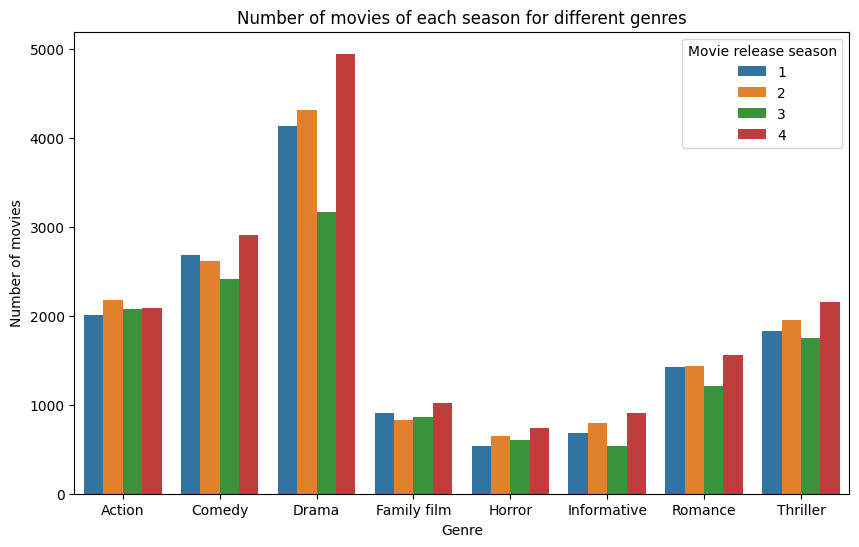

In [33]:
# Utiliser la fonction melt pour "faire fondre" les colonnes de genres
melted_df = pd.melt(df_vis, id_vars=['Movie release season'], value_vars=['genre 1', 'genre 2'], var_name='Genre', value_name='Genre_unique')

# Compter le nombre de films pour chaque genre dans chaque saison
genre_season_counts = melted_df.groupby(['Genre_unique', 'Movie release season']).size().reset_index(name='Nombre de films')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre_unique', y='Nombre de films', hue='Movie release season', data=genre_season_counts)
plt.title('Number of movies of each season for different genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()

Season 1 is winter, 2 is spring, 3 summer and 4 fall

Then, this is the distribution of movies per genre in each season

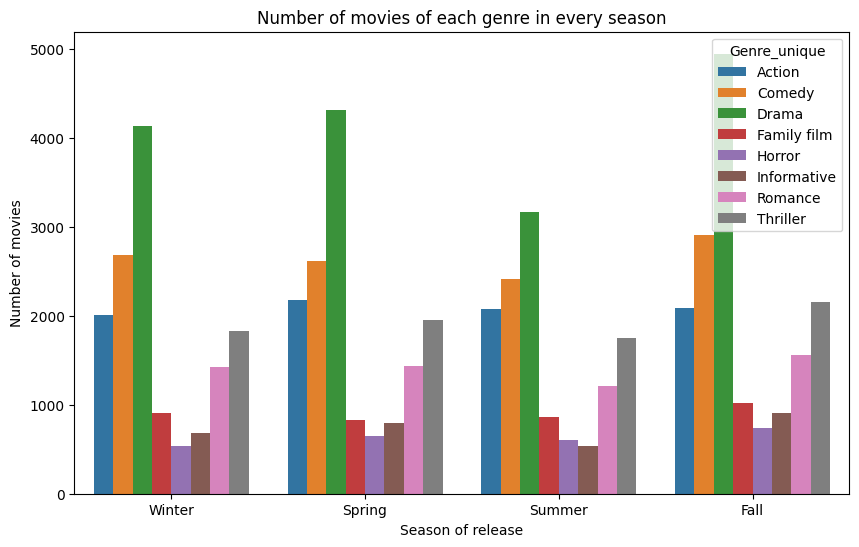

In [34]:
melted_df = pd.melt(df_vis, id_vars=['Movie release season'], value_vars=['genre 1', 'genre 2'], value_name='Genre_unique')

# Compter le nombre de films pour chaque genre dans chaque saison
genre_season_counts = melted_df.groupby(['Genre_unique', 'Movie release season']).size().reset_index(name='Nombre de films')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Movie release season', y='Nombre de films', hue='Genre_unique', data=genre_season_counts)
plt.title('Number of movies of each genre in every season')
plt.xlabel('Season of release')
plt.ylabel('Number of movies')
season_labels = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

Both of these figure aren't showing some obvious pattern so we will continue with other kind of visualisation.

#### **2) Looking for peaks in months for specific genres**



We first focus on the horror movies. Our goal is to determine if there are pics for certain months, or if the distribution is homogeneous. 

In [35]:
from helpers_part1 import genre_distribution_over_month
from helpers import visu_P2
from helpers import visualizing_data

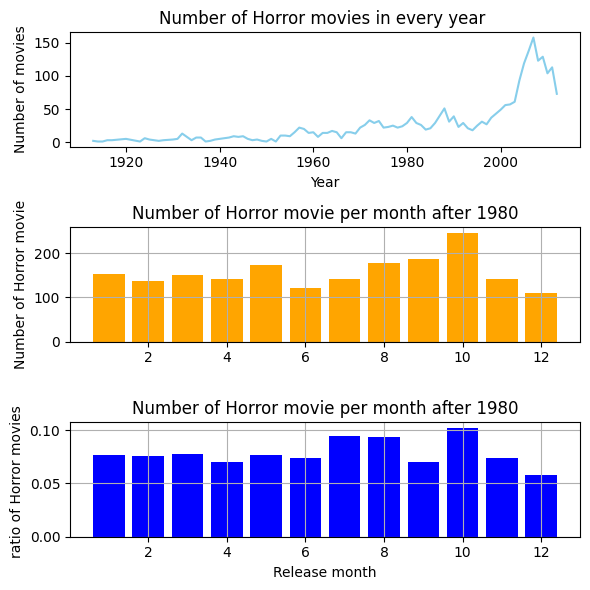

In [36]:
visu_P2(df_vis, 1980, 'Horror')

These plots show the total number of horror movies over the years and the number and ratio of horror movies per months. We decided to keep the movies after 1980 to have enough movies in each year. One can see a clear pic for the month of october.
This tends to show that the horror movies are more released in october which might be linked to Halloween.

**2.2) Evolution of the number of Family movies with months**

Here is the distribution of movies for the Family film genre.

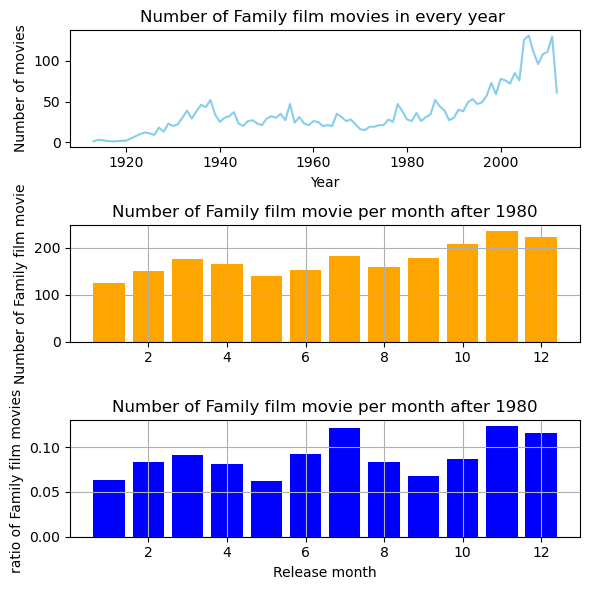

In [17]:
visu_P2(df_vis, 1980, 'Family film')

We can see several pics, one in July and then during Christmas time in November and December. There might be a pattern here which could be linked to the holidays in summer and christmas in november/december

**2.3) Evolution of the number of Romance movies with months**

The following figure shows the distribution of the Romance movies

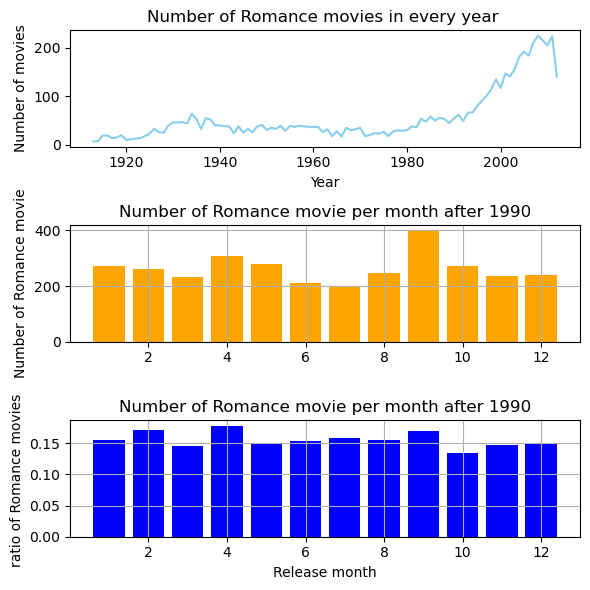

In [25]:
visu_P2(df_vis,1990, 'Romance')

The distribution is more homogenous here and we can not clearly see any peaks, even if February and April seems to get more Romance movies than usual. It might be because of Valentine's Day!!

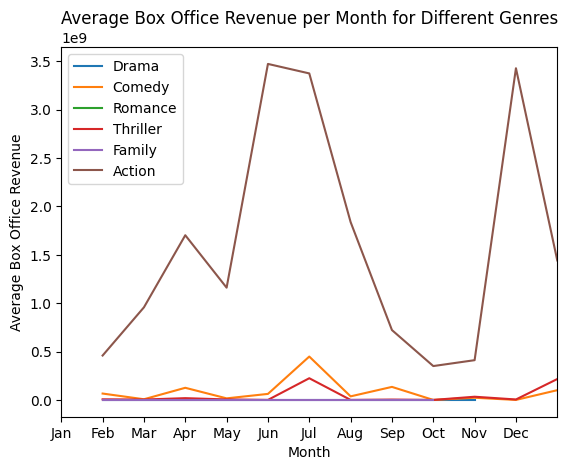

In [46]:
monthly_revenue_drama = drama_genres.groupby(drama_genres['Movie release month'])['Movie box office revenue'].sum()
monthly_revenue_comedy = comedy_genres.groupby(comedy_genres['Movie release month'])['Movie box office revenue'].sum()
monthly_revenue_romance = romance_genres.groupby(romance_genres['Movie release month'])['Movie box office revenue'].sum()
monthly_revenue_thriller = thriller_genres.groupby(thriller_genres['Movie release month'])['Movie box office revenue'].sum()
monthly_revenue_family = family_genres.groupby(family_genres['Movie release month'])['Movie box office revenue'].sum()
monthly_revenue_action = action_genres.groupby(action_genres['Movie release month'])['Movie box office revenue'].sum()

# calculate the average revenue per month
average_monthly_revenue_drama = monthly_revenue_drama.groupby(level=0).mean()
average_monthly_revenue_comedy = monthly_revenue_comedy.groupby(level=0).mean()
average_monthly_revenue_romance = monthly_revenue_romance.groupby(level=0).mean()
average_monthly_revenue_thriller = monthly_revenue_thriller.groupby(level=0).mean()
average_monthly_revenue_family = monthly_revenue_family.groupby(level=0).mean()
average_monthly_revenue_action = monthly_revenue_action.groupby(level=0).mean()

average_monthly_revenue_drama.plot( kind='line', title='Average Box Office Revenue per Month for Different Genres', label='Drama')
average_monthly_revenue_comedy.plot( kind='line', label='Comedy')
average_monthly_revenue_romance.plot( kind='line', label='Romance')
average_monthly_revenue_thriller.plot( kind='line', label='Thriller')
average_monthly_revenue_family.plot( kind='line', label='Family')
average_monthly_revenue_action.plot( kind='line', label='Action')

plt.xlabel('Month')
plt.ylabel('Average Box Office Revenue')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,12)
plt.legend()
plt.show()

Let's explore all of these observations to confirm these first impressions or check if there are simple coincidence. 

#### **2) Statistics: t-test, causal**
#### **2) ...**